In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv(r"C:\Users\teres\OneDrive\The Code Institute\School Performance Analysis\SchoolPerformanceAnalysis.csv")

In [3]:
df_copy = df.copy()

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df.shape

(1000, 8)

In [8]:
# Extensive EDA


In [9]:
df["gender"].value_counts(normalize=True)*100  # Fairly equal dist of males and females

gender
female    51.8
male      48.2
Name: proportion, dtype: float64

In [10]:
df["race/ethnicity"].value_counts(normalize=True)*100 # Should we group A + B = 

race/ethnicity
group C    31.9
group D    26.2
group B    19.0
group E    14.0
group A     8.9
Name: proportion, dtype: float64

In [11]:
df["parental level of education"].value_counts(normalize=True)*100  # should we group bachelors degree and master degree

parental level of education
some college          22.6
associate's degree    22.2
high school           19.6
some high school      17.9
bachelor's degree     11.8
master's degree        5.9
Name: proportion, dtype: float64

In [12]:
df["lunch"].value_counts(normalize=True)*100 

lunch
standard        64.5
free/reduced    35.5
Name: proportion, dtype: float64

In [13]:
df["test preparation course"].value_counts(normalize=True)*100 

test preparation course
none         64.2
completed    35.8
Name: proportion, dtype: float64

In [14]:
df["math score"].value_counts(normalize=True)*100 

math score
65    3.6
62    3.5
69    3.2
59    3.2
73    2.7
     ... 
24    0.1
26    0.1
19    0.1
23    0.1
8     0.1
Name: proportion, Length: 81, dtype: float64

<Axes: ylabel='Frequency'>

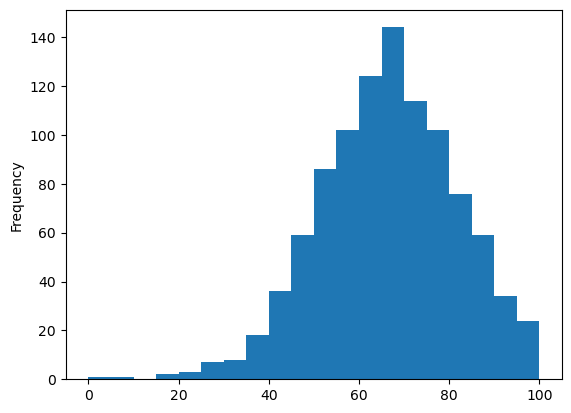

In [15]:
df["math score"].plot(kind="hist", bins=20)

<Axes: ylabel='Frequency'>

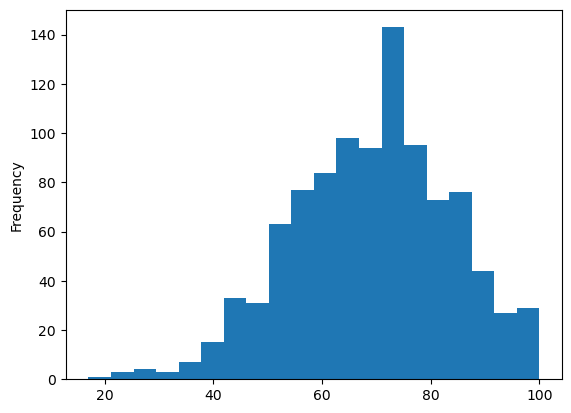

In [16]:
df["reading score"].plot(kind="hist", bins=20)

<Axes: ylabel='Frequency'>

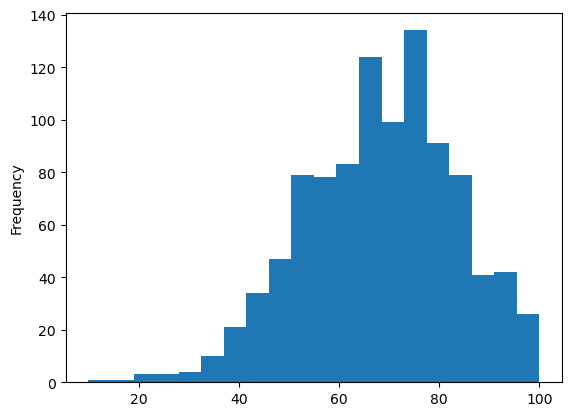

In [17]:
df["writing score"].plot(kind="hist", bins=20)

In [18]:
df.describe()  # scores for each subject are very similar

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


<Axes: >

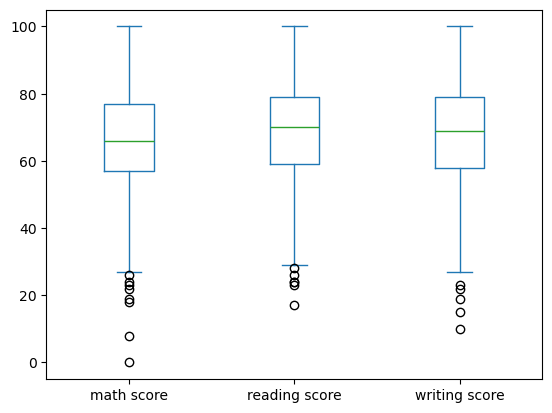

In [19]:
df[["math score", "reading score", "writing score"]].plot(kind="box") 

In [20]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [21]:
df["gender"].unique()

array(['female', 'male'], dtype=object)

In [22]:
df["gender"] = df["gender"].replace({"female":1, "male":2})

In [23]:
df["gender"].unique()

array([1, 2])

In [24]:
df["race/ethnicity"].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [25]:
df["race/ethnicity"] = df["race/ethnicity"].replace({"group A": 1, "group B":2, "group C": 3, "group D": 4, "group E": 5})

In [26]:
df["race/ethnicity"].unique()

array([2, 3, 1, 4, 5])

In [27]:
df["parental level of education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [28]:
df["parental level of education"] = df["parental level of education"].replace({"bachelor's degree": 5,'some college': 3, "master's degree": 6,
       "associate's degree": 4, 'high school': 2, 'some high school':1})

In [29]:
df["parental level of education"].unique()


array([5, 3, 6, 4, 2, 1])

In [30]:
df["lunch"].unique()

array(['standard', 'free/reduced'], dtype=object)

In [31]:
df["lunch"] = df["lunch"].replace({'standard': 1, 'free/reduced':2})

In [32]:
df["lunch"].unique()

array([1, 2])

In [33]:
df["test preparation course"].unique()

array(['none', 'completed'], dtype=object)

In [34]:
df["test preparation course"] = df["test preparation course"]. replace({'none': 1, 'completed':2})

In [35]:
df.dtypes

gender                         int64
race/ethnicity                 int64
parental level of education    int64
lunch                          int64
test preparation course        int64
math score                     int64
reading score                  int64
writing score                  int64
dtype: object

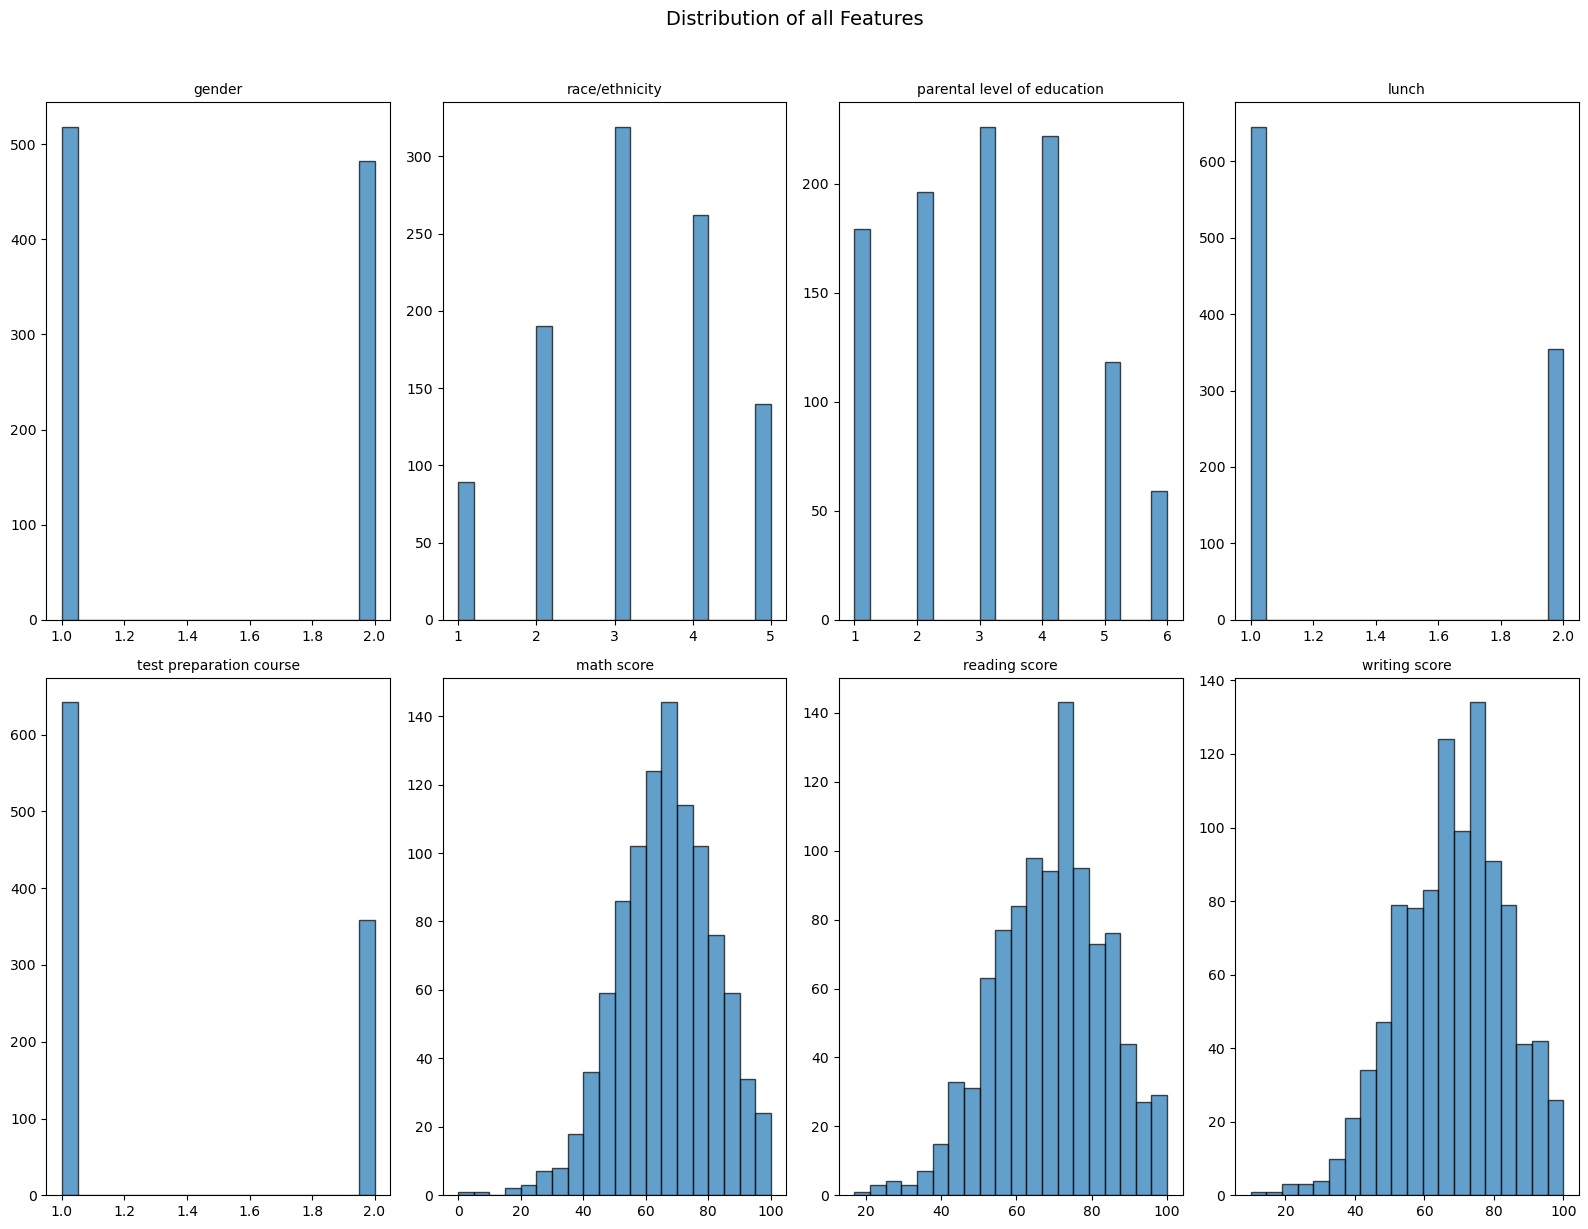

In [36]:
fig, axes = plt.subplots(2, 4, figsize=(16, 12))
axes = axes.ravel()

for idx, col in enumerate(df.columns[:8]):
    axes[idx].hist(df[col], bins=20, edgecolor='black', alpha=0.7)
    axes[idx].set_title(col, fontsize=10)
    axes[idx].set_xlabel('')

plt.suptitle('Distribution of all Features', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

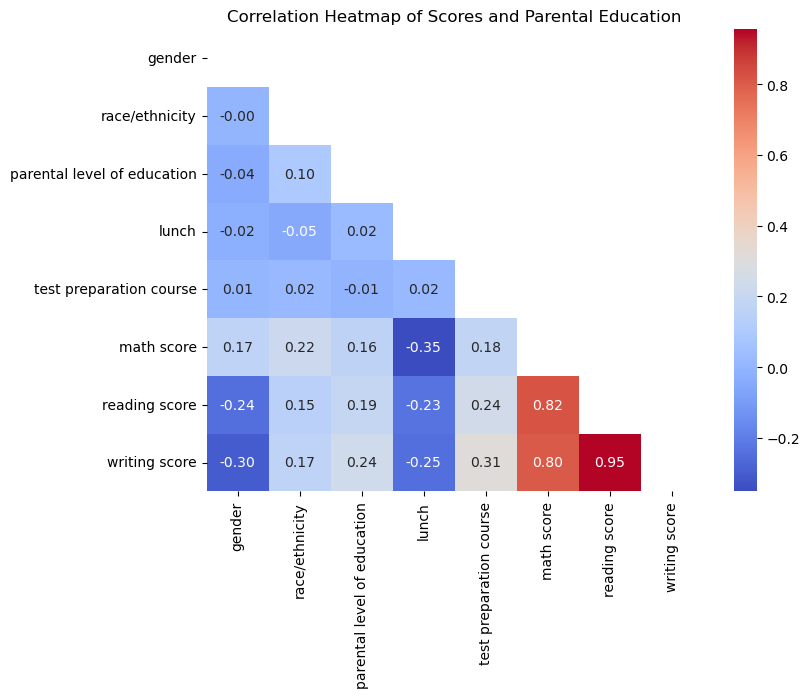

In [37]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, mask=mask, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Scores and Parental Education")
plt.show()

In [38]:
df.corr() # main ones are all scores highly correlated

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
gender,1.000000,-0.001502,-0.043934,-0.021372,0.006028,0.167982,-0.244313,-0.301225
race/ethnicity,-0.001502,1.000000,0.095906,-0.046563,0.017508,0.216415,0.145253,0.165691
parental level of education,-0.043934,0.095906,1.000000,0.023259,-0.007143,0.159432,0.190908,0.236715
lunch,-0.021372,-0.046563,0.023259,1.000000,0.017044,-0.350877,-0.229560,-0.245769
test preparation course,0.006028,0.017508,-0.007143,0.017044,1.000000,0.177702,0.241780,0.312946
math score,0.167982,0.216415,0.159432,-0.350877,0.177702,1.000000,0.817580,0.802642
reading score,-0.244313,0.145253,0.190908,-0.229560,0.241780,0.817580,1.000000,0.954598
writing score,-0.301225,0.165691,0.236715,-0.245769,0.312946,0.802642,0.954598,1.000000


In [39]:
df[["race/ethnicity", "parental level of education", "math score", "reading score", "writing score"]].corr()

,race/ethnicity,parental level of education,math score,reading score,writing score
race/ethnicity,1.000000,0.095906,0.216415,0.145253,0.165691
parental level of education,0.095906,1.000000,0.159432,0.190908,0.236715
math score,0.216415,0.159432,1.000000,0.817580,0.802642
reading score,0.145253,0.190908,0.817580,1.000000,0.954598
writing score,0.165691,0.236715,0.802642,0.954598,1.000000


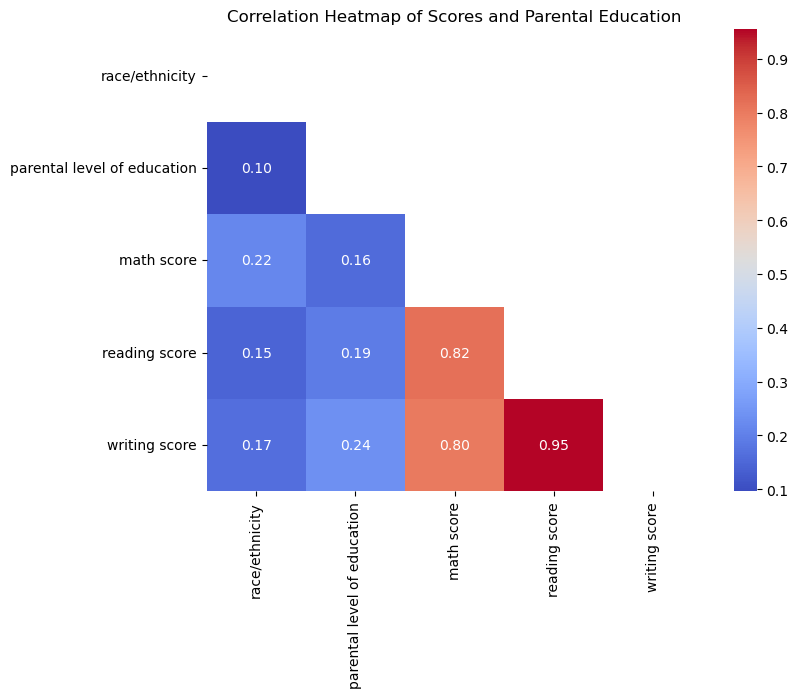

In [40]:
corr = df[["race/ethnicity", "parental level of education", "math score", "reading score", "writing score"]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, mask=mask, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Scores and Parental Education")
plt.show()

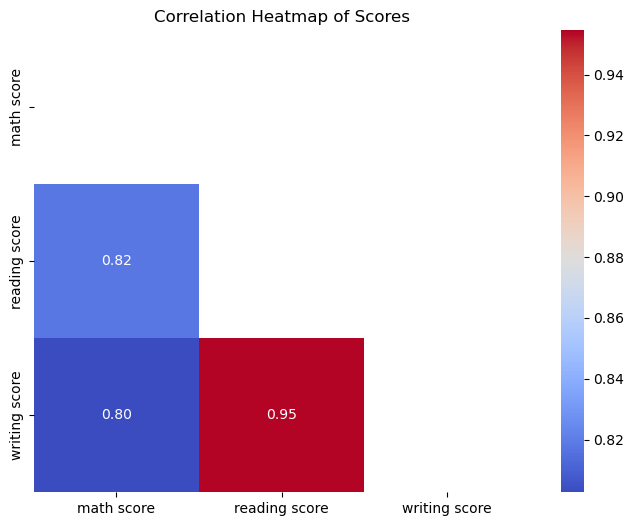

In [41]:
corr = df[["math score", "reading score", "writing score"]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, mask=mask, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Scores")
plt.show()

In [42]:
df_scores = df[["math score", "reading score", "writing score"]]
df_scores.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [47]:
columns_list = df.columns.tolist()
print(columns_list)

['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']


In [49]:
df_math_score = df[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score']]
df_math_score.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score
0,1,2,5,1,1,72
1,1,3,3,1,2,69
2,1,2,6,1,1,90
3,2,1,4,2,1,47
4,2,3,3,1,1,76


In [50]:
df_math_score.corr()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score
gender,1.000000,-0.001502,-0.043934,-0.021372,0.006028,0.167982
race/ethnicity,-0.001502,1.000000,0.095906,-0.046563,0.017508,0.216415
parental level of education,-0.043934,0.095906,1.000000,0.023259,-0.007143,0.159432
lunch,-0.021372,-0.046563,0.023259,1.000000,0.017044,-0.350877
test preparation course,0.006028,0.017508,-0.007143,0.017044,1.000000,0.177702
math score,0.167982,0.216415,0.159432,-0.350877,0.177702,1.000000


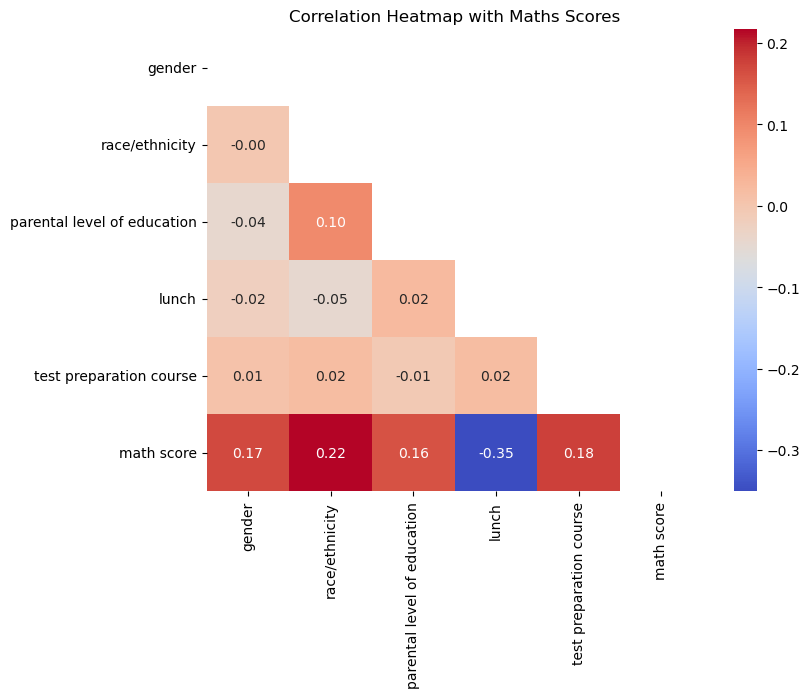

In [67]:
corr = df_math_score.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, mask=mask, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap with Maths Scores")
plt.show()

In [58]:
df_reading_score = df[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'reading score']]
df_reading_score.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score
0,1,2,5,1,1,72
1,1,3,3,1,2,90
2,1,2,6,1,1,95
3,2,1,4,2,1,57
4,2,3,3,1,1,78


In [59]:
df_reading_score.corr()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score
gender,1.000000,-0.001502,-0.043934,-0.021372,0.006028,-0.244313
race/ethnicity,-0.001502,1.000000,0.095906,-0.046563,0.017508,0.145253
parental level of education,-0.043934,0.095906,1.000000,0.023259,-0.007143,0.190908
lunch,-0.021372,-0.046563,0.023259,1.000000,0.017044,-0.229560
test preparation course,0.006028,0.017508,-0.007143,0.017044,1.000000,0.241780
reading score,-0.244313,0.145253,0.190908,-0.229560,0.241780,1.000000


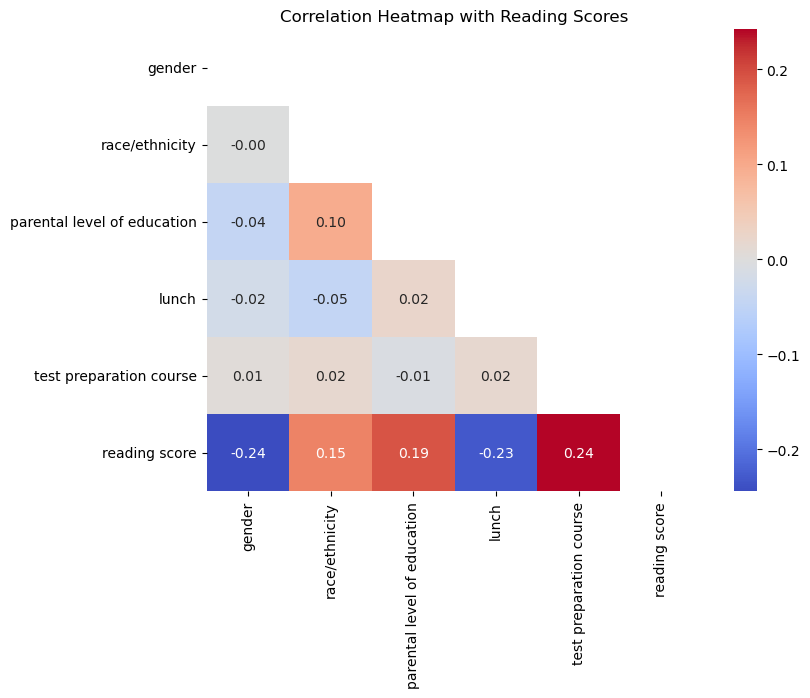

In [68]:
corr = df_reading_score.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, mask=mask, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap with Reading Scores")
plt.show()

In [60]:
df_writing_score = df[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'writing score']]
df_writing_score.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,writing score
0,1,2,5,1,1,74
1,1,3,3,1,2,88
2,1,2,6,1,1,93
3,2,1,4,2,1,44
4,2,3,3,1,1,75


In [61]:
df_writing_score.corr()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,writing score
gender,1.000000,-0.001502,-0.043934,-0.021372,0.006028,-0.301225
race/ethnicity,-0.001502,1.000000,0.095906,-0.046563,0.017508,0.165691
parental level of education,-0.043934,0.095906,1.000000,0.023259,-0.007143,0.236715
lunch,-0.021372,-0.046563,0.023259,1.000000,0.017044,-0.245769
test preparation course,0.006028,0.017508,-0.007143,0.017044,1.000000,0.312946
writing score,-0.301225,0.165691,0.236715,-0.245769,0.312946,1.000000


Text(0.5, 1.0, 'Correlation Heatmap with Writing Scores')

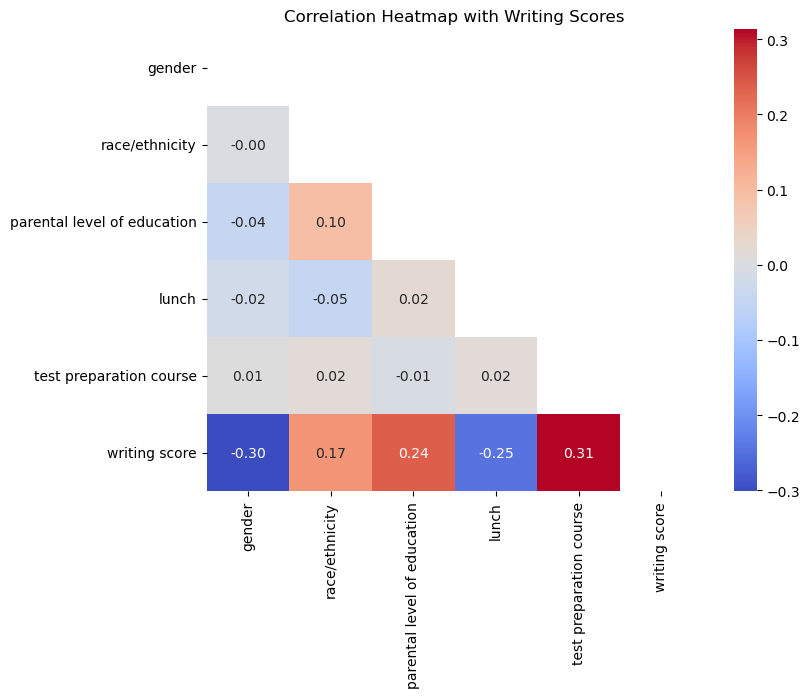

In [69]:
corr = df_writing_score.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, mask=mask, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap with Writing Scores")


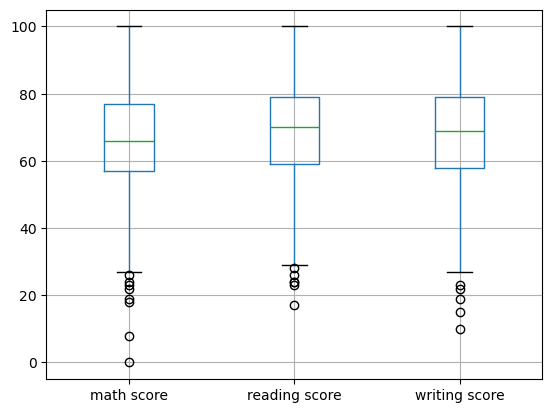

In [74]:
df_scores.boxplot()
plt.show()

In [75]:
df_scores.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [79]:
q_values_maths = df["math score"].quantile([0.33, 0.66])
print("Maths 33rd percentile:", q_values_maths.loc[0.33])
print("Maths 66th percentile:", q_values_maths.loc[0.66])
q_values_reading = df["reading score"].quantile([0.33, 0.66])
print("Reading 33rd percentile:", q_values_reading.loc[0.33])
print("Reading 66th percentile:", q_values_reading.loc[0.66])
q_values_writing = df["writing score"].quantile([0.33, 0.66])
print("Writing 33rd percentile:", q_values_writing.loc[0.33])
print("Writing 66th percentile:", q_values_writing.loc[0.66])


Maths 33rd percentile: 60.0
Maths 66th percentile: 73.0
Reading 33rd percentile: 63.0
Reading 66th percentile: 76.0
Writing 33rd percentile: 62.0
Writing 66th percentile: 75.0
